In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")

print(movies)

                                               FILM  RottenTomatoes  \
0                    Avengers: Age of Ultron (2015)              74   
1                                 Cinderella (2015)              85   
2                                    Ant-Man (2015)              80   
3                            Do You Believe? (2015)              18   
4                     Hot Tub Time Machine 2 (2015)              14   
5                          The Water Diviner (2015)              63   
6                             Irrational Man (2015)              42   
7                                   Top Five (2014)              86   
8                      Shaun the Sheep Movie (2015)              99   
9                               Love & Mercy (2015)              89   
10                Far From The Madding Crowd (2015)              84   
11                                 Black Sea (2015)              82   
12                                 Leviathan (2014)              99   
13    

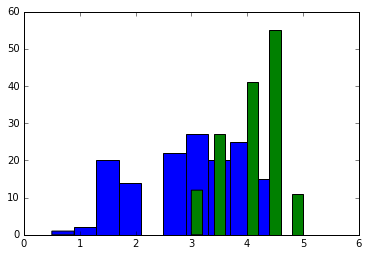

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"])
plt.hist(movies["Fandango_Stars"])
plt.show()

# difference

Metacritic_norm_round's score disrtibution is more platykurtic, while Fandango_Stars is mroe
leptokurtic

In [6]:
Metacritic_norm_round_mean = movies["Metacritic_norm_round"].mean()
Metacritic_norm_round_median = movies["Metacritic_norm_round"].median()
Metacritic_norm_round_std = movies["Metacritic_norm_round"].std()

Fandango_Stars_mean = movies["Fandango_Stars"].mean()
Fandango_Stars_median = movies["Fandango_Stars"].median()
Fandango_Stars_std = movies["Fandango_Stars"].std()

print("metactritic mean, median, std = ", Metacritic_norm_round_mean, Metacritic_norm_round_median, Metacritic_norm_round_std)
print("fandango mean, median, std = ", Fandango_Stars_mean, Fandango_Stars_median, Fandango_Stars_std)


metactritic mean, median, std =  2.97260273973 3.0 0.990960561374
fandango mean, median, std =  4.08904109589 4.0 0.540385977979



# Fandango vs Metacritic Methodology

##### Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

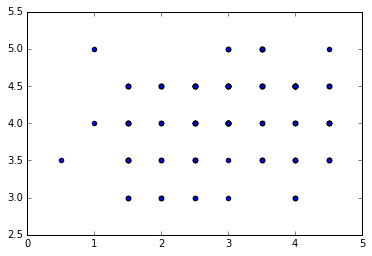

In [7]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [11]:
import numpy as np
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
sorted_movies = movies.sort_values("fm_diff", ascending=False)
print(sorted_movies["FILM"].head(5))

print(sorted_movies["fm_diff"].head(5))

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object
3      4.0
85     3.0
47     3.0
19     3.0
134    3.0
Name: fm_diff, dtype: float64


In [17]:
from scipy.stats import pearsonr

print("correlation, p-value = ", pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"]))



correlation, p-value =  (0.17844919073895918, 0.031161516228523815)


The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [20]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(slope, intercept, r_value, p_value, stderr_slope)

pred_3 = 3 * slope + intercept
print(pred_3)

0.0973110779739 3.7997739189 0.178449190739 0.0311615162285 0.0447135446568
4.09170715282


In [22]:
pred_1 = 1* slope + intercept
print(pred_1)

pred_5 = 5 * slope + intercept
print(pred_5)

def predict(num):
    return num*slope + intercept

3.89708499687
4.28632930877


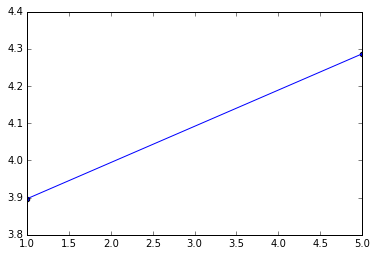

In [24]:
plt.scatter([1.0, 5.0], [predict(1.0), predict(5.0)])
plt.plot([1.0, 5.0], [predict(1.0), predict(5.0)])
plt.xlim(1,5)
plt.show()
